# Processing and stacking astrophotography images

As a first step we will process a single image using common image processing operations. After that the same operations will be ran on a multitude of images to show the impact on noise. Finally the results will be aggregated in an mp4 image. 

## Import image


In [1]:
import cv2
import numpy as np

# Specify the path to the image
image_path = r"E:\Astronomie\Images\Nebulas\Orion Nebula\Orion 11 feb 2020\Image data\JPEG\IMG_6407.JPG"

def read_image(path): 
    # Load the image
    image = cv2.imread(path)

    # Check if the image was loaded
    if image is not None:
        print("Image imported")
    else:
        raise FileNotFoundError("Image not found or failed to load.")
    return image

# Load the image
image = read_image(image_path)

Image imported


In [2]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\projecten\Newline Talk\newline-talk


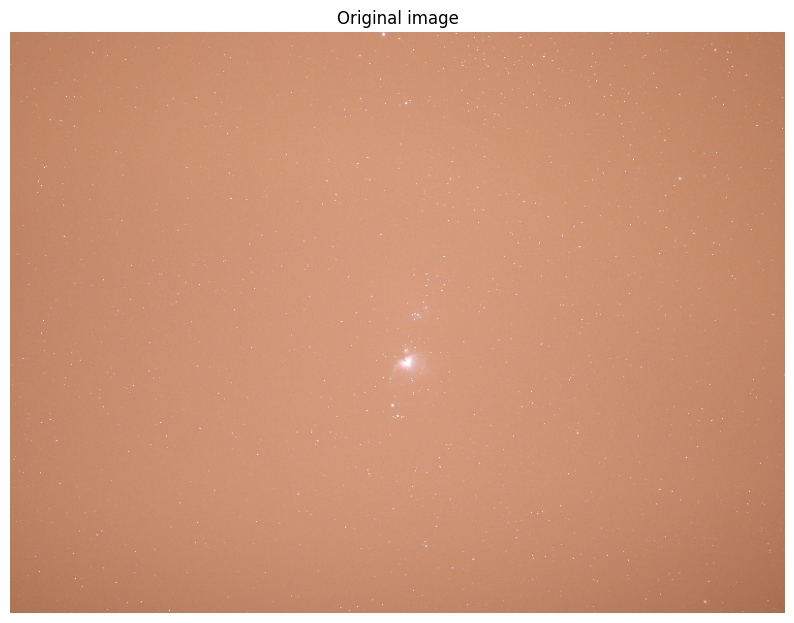

Image saved to: c:\projecten\Newline Talk\newline-talk\Images\Original image.png


In [3]:
import os

import matplotlib.pyplot as plt
def display_image(image, dimensions = (800,800), title="Untitled"):    
    resized_image = cv2.resize(image, dimensions)
    # Convert BGR to RGB for correct color display in matplotlib
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Display the resized image using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(resized_image_rgb)
    plt.title(title)
    plt.axis('off')  # Hide the axes for a cleaner display
    save_path = os.path.join(os.getcwd(), "Images", f"{title}.png")
    plt.savefig(save_path, bbox_inches='tight')  # Save the plot
    plt.show()
    print(f"Image saved to: {save_path}")


display_image(image, (800,600), "Original image")

## Cropping

In [4]:
def crop(image, center, dimensions): 
    center_x, center_y = center
    width, height = dimensions
    
    x_start = center_x - width // 2
    y_start = center_y - height // 2
    x_end = center_x + width // 2
    y_end = center_y + height // 2
    return image[y_start:y_end, x_start:x_end]; 

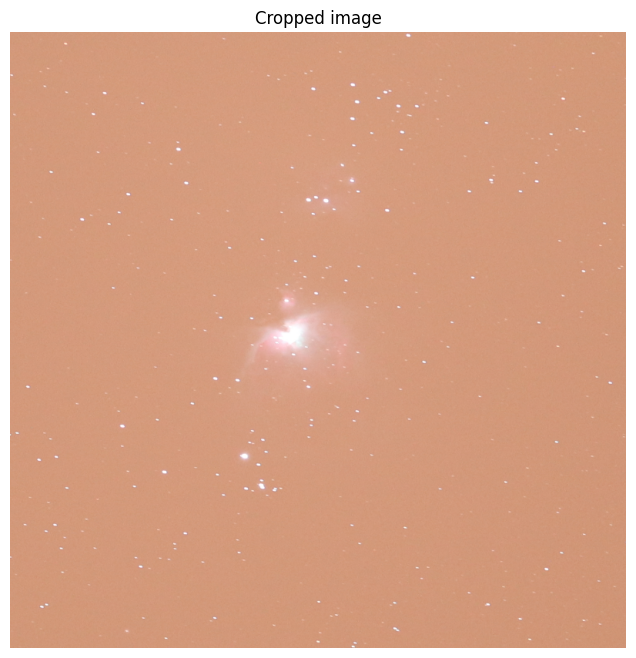

Image saved to: c:\projecten\Newline Talk\newline-talk\Images\Cropped image.png


In [5]:

# Center of the crop area
center = (3140, 2290)

# Width and height of the crop area
dimensions = (1500, 1500)

# Calculate cropping boundaries using the center point
cropped_image = crop(image, center, dimensions)
# Resize the image to 800x600

display_image(cropped_image, (800,800), "Cropped image")

## Splitting the image into its RGB components

In [6]:
b_channel, g_channel, r_channel = cv2.split(cropped_image)

# Create an empty channel with the same dimensions as the input image channels
empty_channel = np.zeros_like(b_channel)

# Create color versions of each channel
blue_image = cv2.merge([b_channel, empty_channel, empty_channel])  
green_image = cv2.merge([empty_channel, g_channel, empty_channel])  
red_image = cv2.merge([empty_channel, empty_channel, r_channel]) 

# Move channel to green and create images
blue_as_green_image = cv2.merge([empty_channel, b_channel, empty_channel])
green_as_green_image = cv2.merge([empty_channel, g_channel, empty_channel])
red_as_green_image = cv2.merge([empty_channel, r_channel, empty_channel])

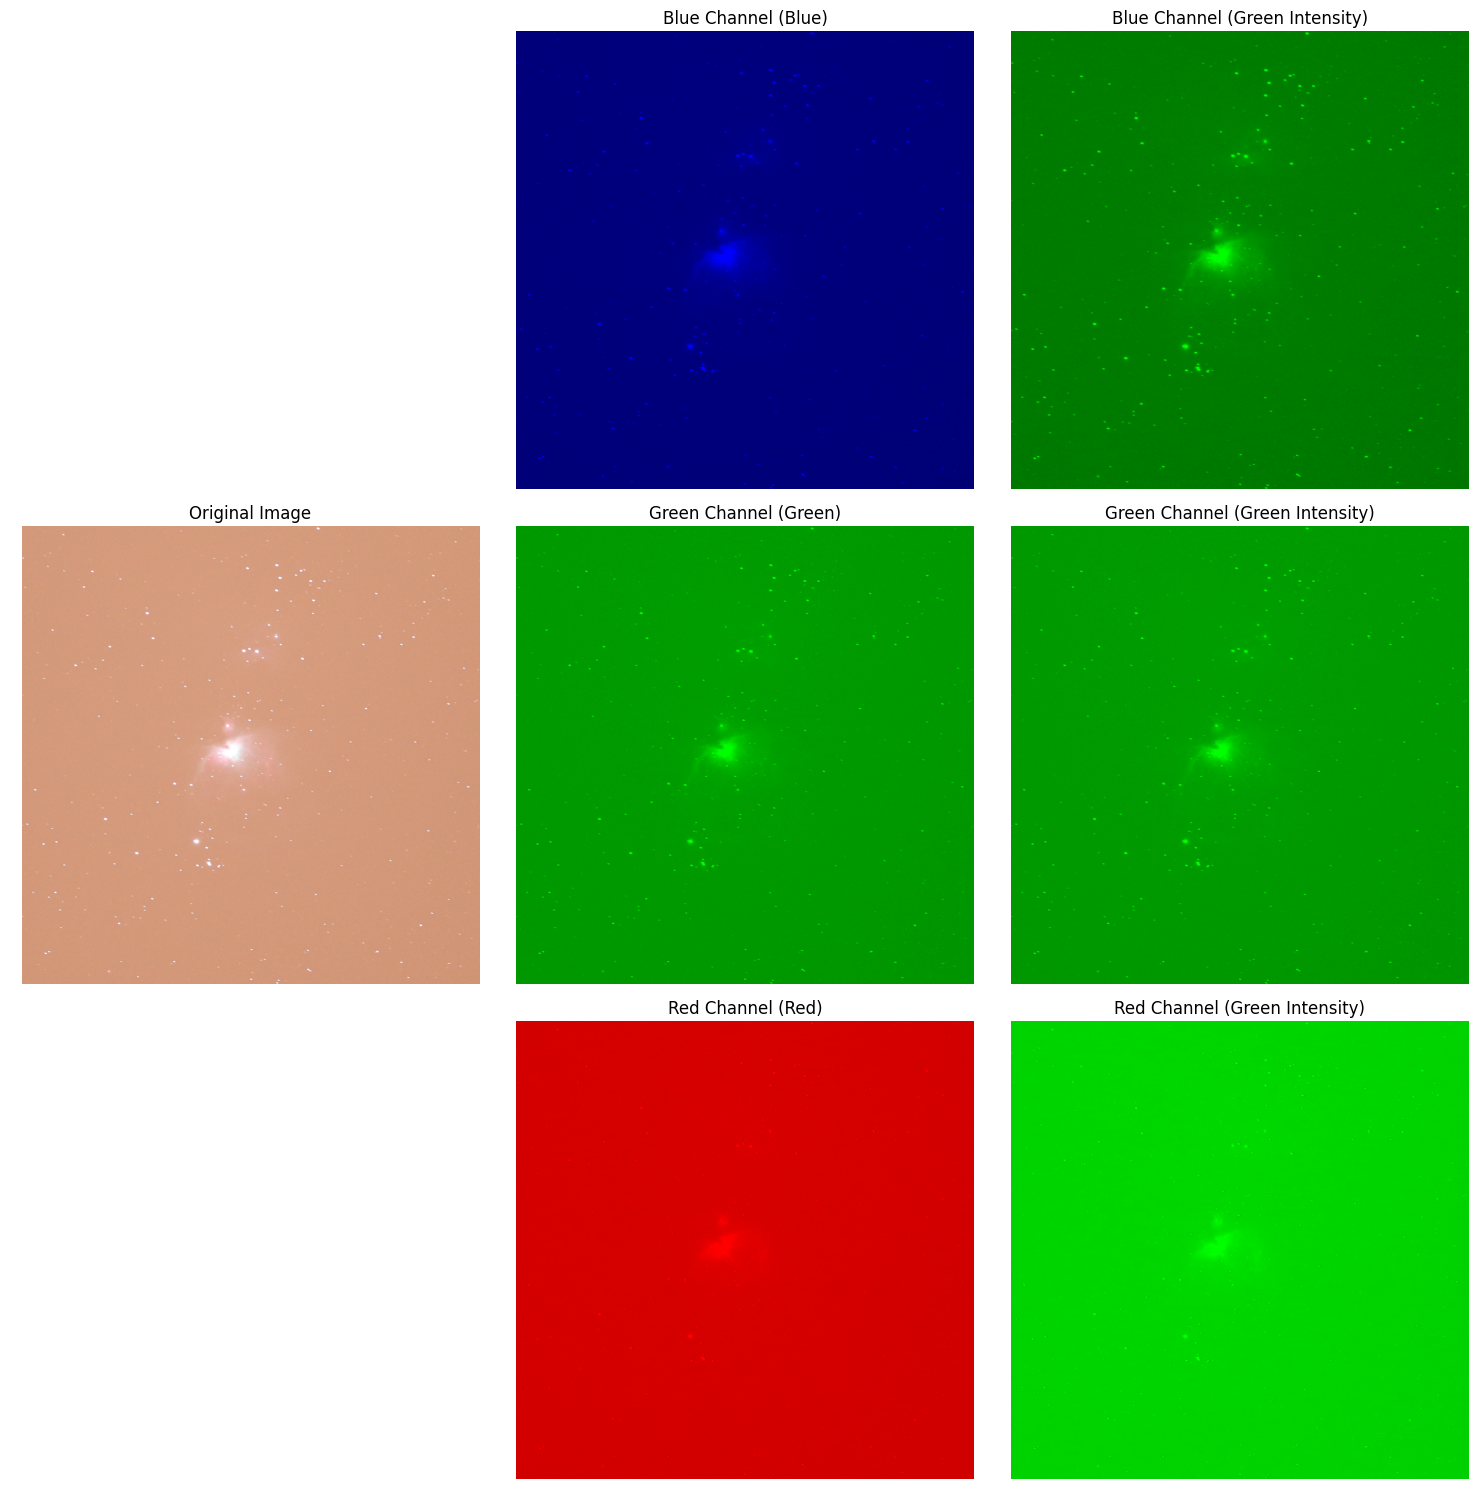

Image saved to: c:\projecten\Newline Talk\newline-talk\Images\Channel seperation.png


In [7]:
# Create a 3x3 grid layout (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Column 1: Original image
axes[1, 0].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("Original Image")
axes[1, 0].axis('off')  # Hide duplicate
axes[2, 0].axis('off')  # Hide empty space

# Column 2: Channels as their respective colors
axes[0, 1].imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("Blue Channel (Blue)")
axes[1, 1].imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title("Green Channel (Green)")
axes[2, 1].imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
axes[2, 1].set_title("Red Channel (Red)")

# Column 3: Channels with green intensity
axes[0, 2].imshow(blue_as_green_image, cmap='gray')
axes[0, 2].set_title("Blue Channel (Green Intensity)")
axes[1, 2].imshow(green_as_green_image, cmap='gray')
axes[1, 2].set_title("Green Channel (Green Intensity)")
axes[2, 2].imshow(red_as_green_image, cmap='gray')
axes[2, 2].set_title("Red Channel (Green Intensity)")

# Remove axes for a cleaner display
for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
save_path = os.path.join(os.getcwd(), "Images", "Channel seperation.png")
plt.savefig(save_path, bbox_inches='tight') 
plt.show()
print(f"Image saved to: {save_path}")


## Transform

In [8]:
def transform(channel, a, b,): 
    offset_channel = np.clip(channel + b, 0, 255)
    scaled_channel = np.clip(offset_channel * a, 0, 255)
    return scaled_channel.astype(np.uint8)

def channel_to_green_image(channel): 
    empty_channel = np.zeros_like(b_channel)
    return cv2.merge([empty_channel, channel, empty_channel])

In [9]:
# Apply different scaling and offset to each channel
b_transformed = transform(b_channel, 2, -110) #2, -110 
g_transformed = transform(g_channel, 2, -140) #2, -140
r_transformed = transform(r_channel, 3, -203) #3 -200

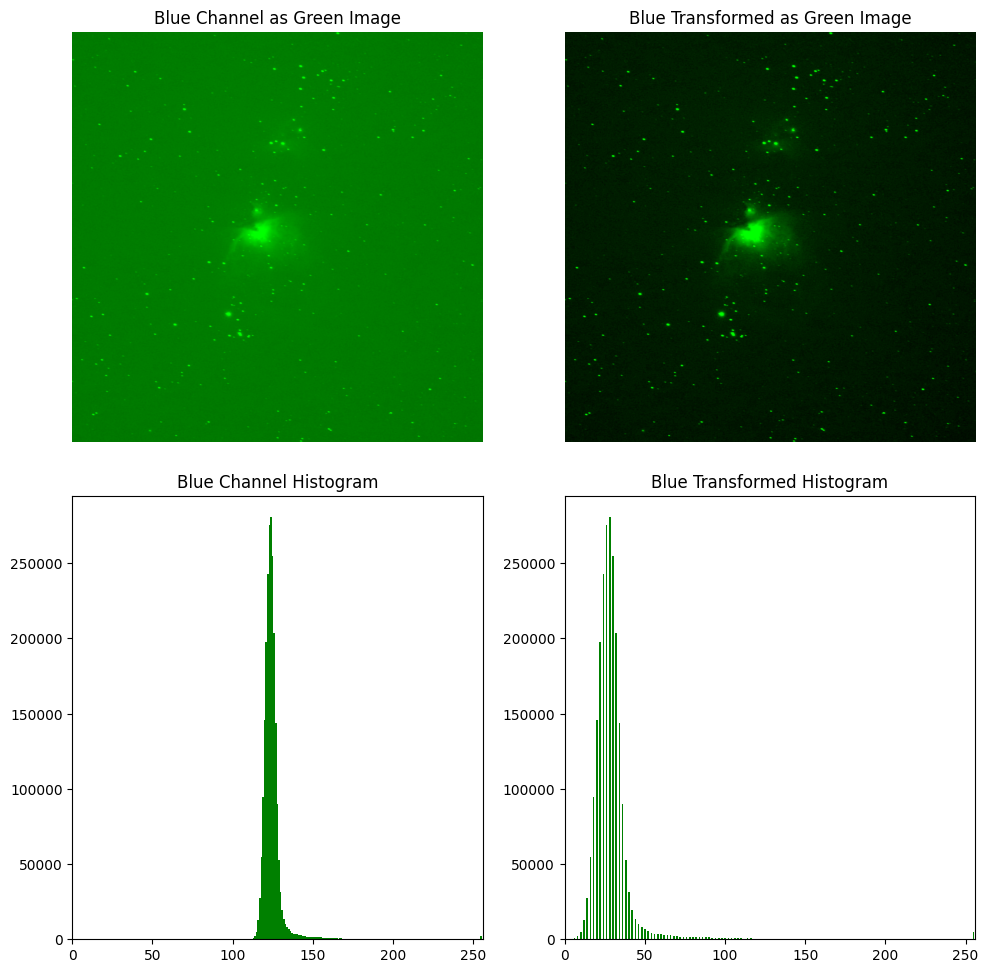

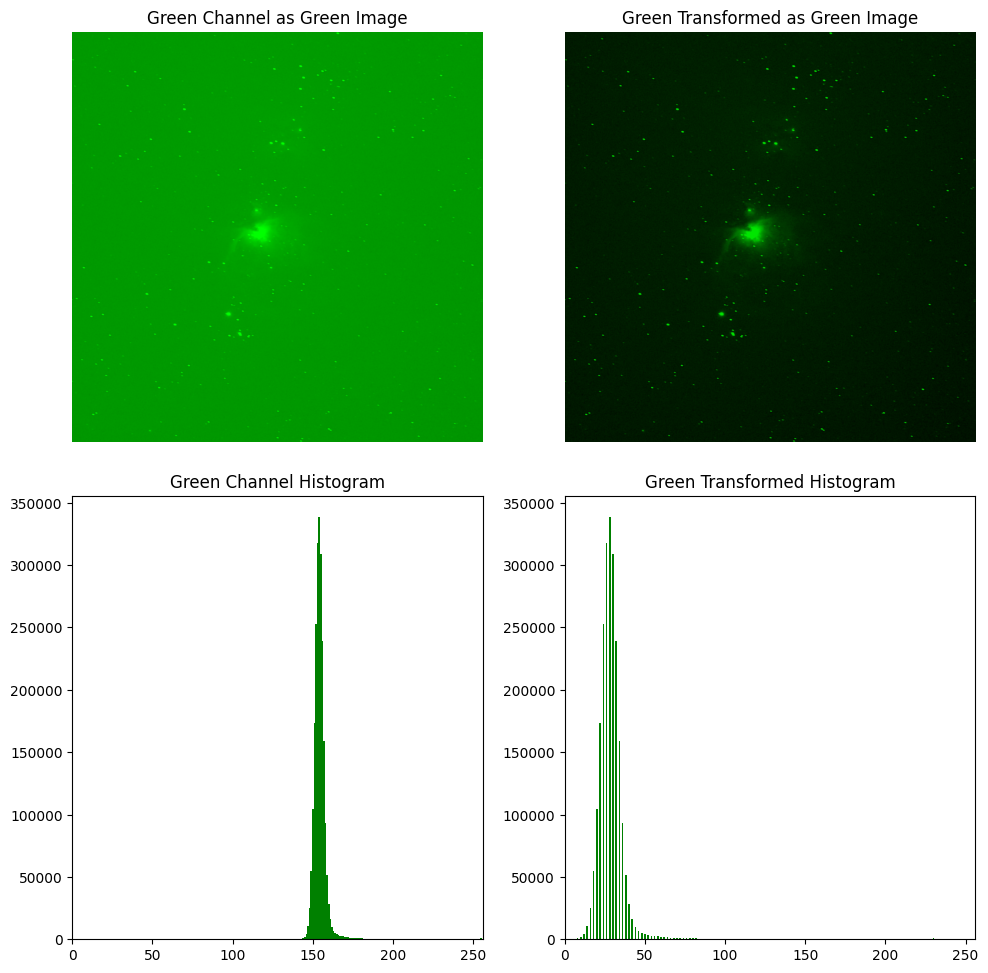

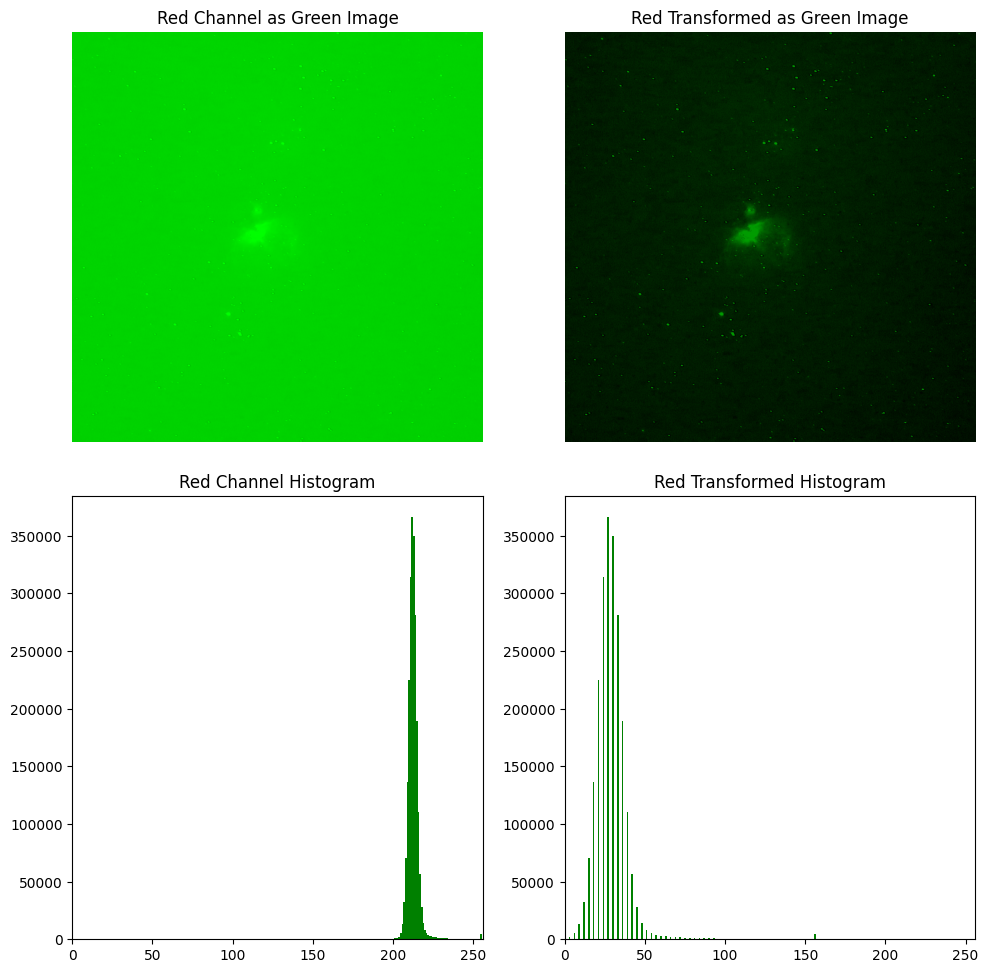

In [10]:
# Function to display the original and transformed image with a histogram
def display_channel_with_histogram(channel, transformed_channel, channel_name):
    # Create the plot
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Display the original channel image (as if displayed in the correct color)
    axes[0, 0].imshow(cv2.cvtColor(channel_to_green_image(channel), cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title(f"{channel_name} Channel as Green Image")
    axes[0, 0].axis('off')  # Hide axes for the image

    # Display the transformed channel image (as if displayed in the correct color)
    axes[0, 1].imshow(cv2.cvtColor(channel_to_green_image(transformed_channel), cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title(f"{channel_name} Transformed as Green Image")
    axes[0, 1].axis('off')  # Hide axes for the image

    # Plot the green histogram for the original channel
    axes[1, 0].bar(np.arange(256), cv2.calcHist([channel], [0], None, [256], [0, 256]).flatten(), width=1.0, color='green')
    axes[1, 0].set_xlim([0, 256])
    axes[1, 0].set_title(f'{channel_name} Channel Histogram')

    # Plot the green histogram for the transformed channel
    axes[1, 1].bar(np.arange(256), cv2.calcHist([transformed_channel], [0], None, [256], [0, 256]).flatten(), width=1.0, color='green')
    axes[1, 1].set_xlim([0, 256])
    axes[1, 1].set_title(f'{channel_name} Transformed Histogram')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    save_path = os.path.join(os.getcwd(), "Images", f'{channel_name} Channel transformation.png')
    plt.savefig(save_path, bbox_inches='tight') 
    plt.show()

display_channel_with_histogram(b_channel, b_transformed, "Blue")
display_channel_with_histogram(g_channel, g_transformed, "Green")
display_channel_with_histogram(r_channel, r_transformed, "Red")

### All channels at once

In [11]:
import numpy as np

def plot_channel_histograms(original_image, transformed_image):
    # Split original and transformed images into B, G, R channels
    original_channels = cv2.split(original_image)
    transformed_channels = cv2.split(transformed_image)
    
    # Calculate histograms for original channels
    original_counts = [cv2.calcHist([channel], [0], None, [256], [0, 256]).flatten() for channel in original_channels]
    
    # Calculate histograms for transformed channels
    transformed_counts = [cv2.calcHist([channel], [0], None, [256], [0, 256]).flatten() for channel in transformed_channels]

    # Pixel intensity values from 0 to 255
    x = np.arange(256)

    # Set up plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Colors and labels for channels
    colors = ['blue', 'green', 'red']
    labels = ["Blue", "Green", "Red"]

    # Plot original channels
    for i, color in enumerate(colors):
        axes[0].bar(x, original_counts[i], color=color, alpha=0.5, width=1.0, label=labels[i])
    axes[0].set_title("Channels - Before Transformation")
    axes[0].set_xlabel("Pixel Intensity")
    axes[0].set_ylabel("Frequency")
    axes[0].set_xlim(0, 255)
    axes[0].legend()

    # Plot transformed channels
    for i, color in enumerate(colors):
        axes[1].bar(x, transformed_counts[i], color=color, alpha=0.5, width=1.0, label=labels[i])
    axes[1].set_title("Channels - After Transformation")
    axes[1].set_xlabel("Pixel Intensity")
    axes[1].set_ylabel("Frequency")
    axes[1].set_xlim(0, 255)
    axes[1].legend()

    plt.tight_layout()
    save_path = os.path.join(os.getcwd(), "Images", f'Channel transformation together.png')
    plt.savefig(save_path, bbox_inches='tight') 
    plt.show()



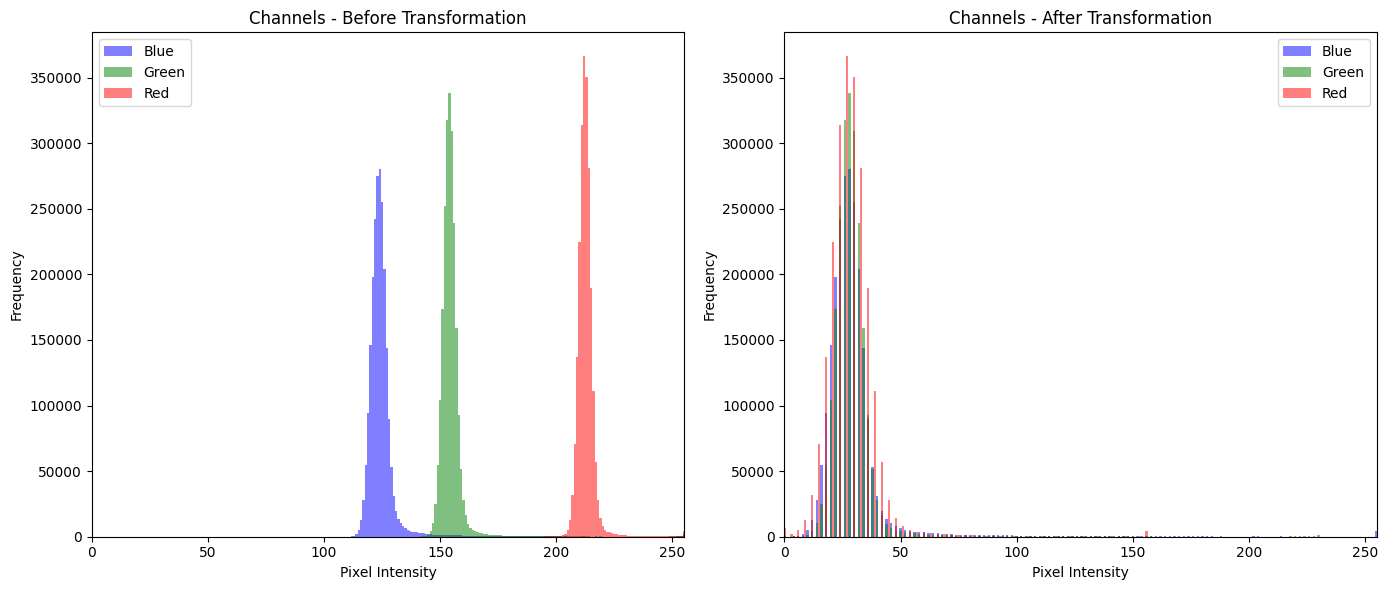

In [12]:


# Merge the channels back into a single image
transformed_image = cv2.merge((b_transformed, g_transformed, r_transformed))

plot_channel_histograms(cropped_image, transformed_image)

## Display

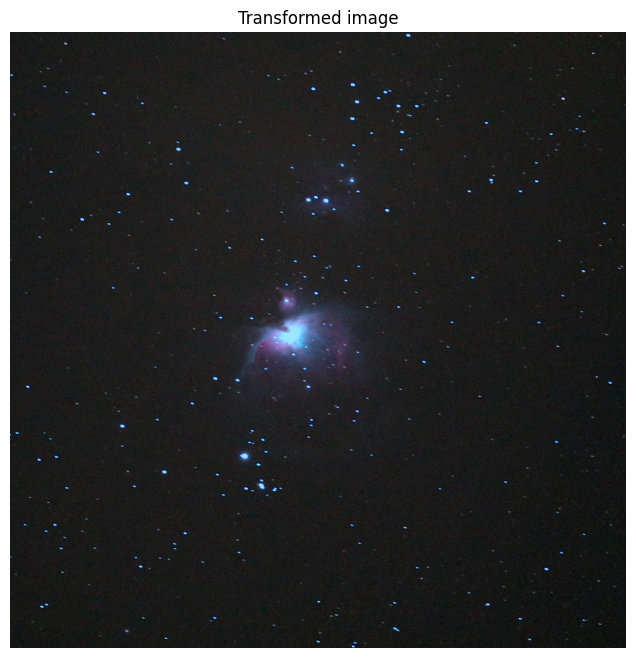

Image saved to: c:\projecten\Newline Talk\newline-talk\Images\Transformed image.png


In [13]:

display_image(transformed_image, (800,800), "Transformed image")

# Stacking multiple images

## Processing a single image in one go

In [14]:
import os

def list_jpg_images(directory):
    jpg_image_names = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.jpg'):
                jpg_image_names.append(os.path.join(root, file))
    return jpg_image_names

# Example usage
image_path = r"E:\Astronomie\Images\Nebulas\Orion Nebula\Orion 11 feb 2020\Image data\JPEG"
jpg_image_names = list_jpg_images(image_path)
print(jpg_image_names)

['E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6406.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6407.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6408.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6409.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6410.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6411.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6412.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6413.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6414.JPG', 'E:\\Astronomie\\Images\\Nebulas\\Orion Nebula\\Orion 11 feb 2020\\Image data\\JPEG\\IMG_6415.JPG',

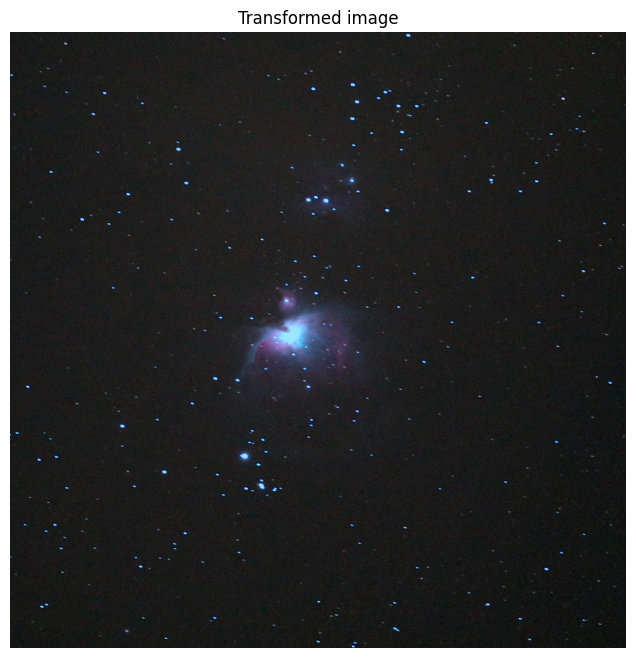

Image saved to: c:\projecten\Newline Talk\newline-talk\Images\Transformed image.png


In [15]:
import cv2
import numpy as np

def color_enhance(image, center, dimensions, b_params, g_params, r_params):
    # Crop the image
    cropped_image = crop(image, center, dimensions)
    
    # Split the image into color channels
    b_channel, g_channel, r_channel = cv2.split(cropped_image)
    
    
    # Apply transformations to each channel
    b_transformed = transform(b_channel, *b_params)
    g_transformed = transform(g_channel, *g_params)
    r_transformed = transform(r_channel, *r_params)
    
    # Merge the channels back into a single image
    transformed_image = cv2.merge((b_transformed, g_transformed, r_transformed))
    
    return transformed_image

# Parameters
center = (3140, 2290)
dimensions = (1500, 1500)
b_params = [2, -110]
g_params = [2, -140]
r_params = [3, -203]

# Process the image
processed_image = color_enhance(image, center, dimensions, b_params, g_params, r_params)

display_image(processed_image, (800,800), "Transformed image")

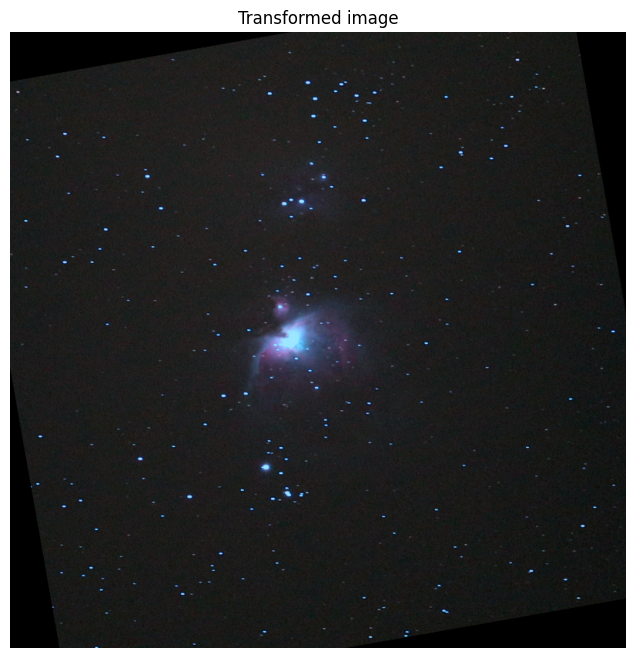

Image saved to: c:\projecten\Newline Talk\newline-talk\Images\Transformed image.png


In [16]:
def euclid_transform(image, dx, dy, angle):
    # Get the dimensions of the image
    (height, width) = image.shape[:2]

    # Calculate the center of the image (pivot for rotation)
    center = (width // 2, height // 2)

    # Create the rotation matrix with the given angle
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Add translation values (dx, dy) to the transformation matrix
    rotation_matrix[0, 2] += dx
    rotation_matrix[1, 2] += dy

    # Apply the affine transformation (rotation + translation)
    transformed_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return transformed_image

rotated_image = euclid_transform(processed_image, 0, 0, 10)
display_image(rotated_image, (800,800), "Transformed image")


In [17]:
import pandas as pd

# Load the CSV file with semicolon as delimiter
df = pd.read_csv('stacking.csv', delimiter=';')

# Combine 'Path' and 'File' columns to create a full path to each image
df['FullPath'] = df['Path'] + '/' + df['File']

# Select only the necessary columns and make a copy
filtered_df = df[['FullPath', 'dX', 'dY', 'Angle']].copy()

# Remove the ° symbol, convert 'Angle' to float
filtered_df['Angle'] = filtered_df['Angle'].str.replace('°', '').astype(float)

# Display the modified DataFrame
print(filtered_df.head())


                                            FullPath      dX      dY  Angle
0  E:/Astronomie/Images/Nebulas/Orion Nebula/Orio...  206.37   94.72   0.38
1  E:/Astronomie/Images/Nebulas/Orion Nebula/Orio...   63.31  -91.22   0.11
2  E:/Astronomie/Images/Nebulas/Orion Nebula/Orio...  174.04   57.78   0.34
3  E:/Astronomie/Images/Nebulas/Orion Nebula/Orio...  199.37   94.08   0.38
4  E:/Astronomie/Images/Nebulas/Orion Nebula/Orio...  212.46  101.74   0.41


Image imported
Image imported


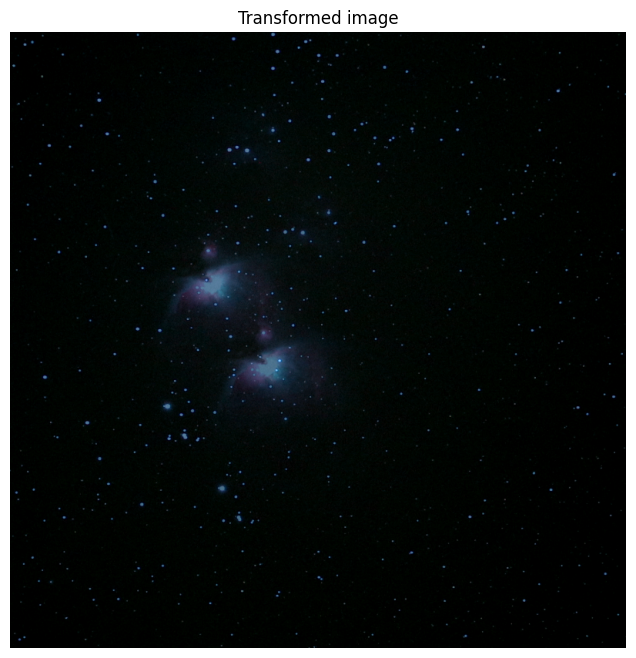

Image saved to: c:\projecten\Newline Talk\newline-talk\Images\Transformed image.png


In [18]:
image_paths = filtered_df['FullPath'].iloc[:2]

# Read the images from the first 2 lines of the DataFrame
good_images = [read_image(img_path) for img_path in image_paths]

# Calculate the average image
average_image = np.mean(good_images, axis=0).astype(np.uint8)

# Assuming `process_image` and `displayImage` are your functions for processing and displaying
processed_image = color_enhance(average_image, center, dimensions, b_params, g_params, r_params)

# Display the processed image
display_image(processed_image, (800, 800), "Transformed image")

https://www.cloudynights.com/topic/772997-deepskystacker-saving-aligned-images-individually/